# I. Lý thuyết

Đây là bảng confusion matrix của một mô hình phân loại nhị phân

![](https://imgur.com/1UZL68u.png)

Hãy cho biết:

1.- Đâu là công thức đúng của _Sensitivity (độ nhạy)_ ?

A. TP/(TP + FP)

B. TP/(TP + FN)

C. TP/(TN + FN)

D. TP/(TN + FP)
 
**Trả lời: B**

2.- Ý nghĩa của _Sensitivity (độ nhạy)_ trong mô hình chuẩn đoán bệnh?

A. Sensitivity cho biết nếu một người mắc bệnh thật thì mô hình có thể nhận biết được mắc bệnh với xác suất là bao nhiêu phần trăm ?

B. Sensitivity cho biết nếu mô hình chuẩn đoán một người mắc bệnh thì người đó có khả năng bị mắc bệnh thật là bao nhiêu phần trăm ?

C. Sensitivity cho biết nếu một người không bị mắc bệnh thì mô hình có thể nhận biết được người đó không mắc bệnh với xác suất bao nhiêu phần trăm ?

D. Sensitivity cho biết trong số những trường hợp không bị mắc bệnh thì mô hình có thể nhận biết được là bao nhiêu phần trăm ?

**Trả lời: A**

Có ba mô hình với cùng accuracy như sau. 

![](https://imgur.com/zXUy6zd.png)

![](https://imgur.com/0GBEf8v.png)

![](https://imgur.com/t5I6f4y.png)

3.- Mô hình nào sẽ được lựa chọn?

A. Mô hình 1

B. Mô hình 2

C. Mô hình 3

D. Cả ba mô hình đều như nhau.

**Trả lời: C Mô hình 3**

4.- f1-score của cả ba mô hình là lần lượt là:

A. m1: 0.571; m2: 0.675; m3: 0.75

B. m1: 0.75; m2: 0.675; m3: 0.889

C. m1: 0.571; m2: 0.75; m3: 0.889

D. không có đáp án nào đúng.

**Trả lời C**

5.- Một mô hình phân loại ngẫu nhiên sẽ có đường ROC như thế nào ?

A. Lồi lên phía trên.

B. Tiệm cận đường chéo nét đứt.

C. Lõm xuống phía dưới.

D. Có dạng hình sin.

**Trả lời: B**

# II. Thực hành

Một mô hình phân loại nhị phân có giá trị dự báo `y_hat` và giá trị ground truth `y` lần lượt như sau:

In [1]:
import numpy as np

y     = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

6. Nếu ngưỡng phân loại `threshold = 0.5`. Viết hàm tính 3 giá trị: `precision, recall, f1-score`


In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Set the threshold for defaults to 0.5
threshold = 0.5
y_predict = np.where(y_hat>threshold, 1, 0)
#y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype('float') # Define threshold in the model

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_predict)
print('Confusion matrix \n',conf_matrix)

# Values of TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y, y_predict).ravel()
print('TN : {}\n FP : {} \n FN : {} \n TP : {}'.format(tn, fp, fn, tp))

# Calculate Precision score
precision = precision_score(y, y_predict)
print('Precision score: {}'.format(precision))

# Calculate Recall score
recall = recall_score(y, y_predict)
print('Recall score: {}'.format(recall))

# Calculate F1 score
f1 = f1_score(y, y_predict)
print('F1 score: {}'.format(f1))

Confusion matrix 
 [[5 0]
 [1 4]]
TN : 5
 FP : 0 
 FN : 1 
 TP : 4
Precision score: 1.0
Recall score: 0.8
F1 score: 0.888888888888889


In [3]:
import pandas as pd
y     = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

# Set the threshold for defaults to 0.5
threshold = 0.5
y_predict = np.where(y_hat>threshold, 1, 0) 


# Define the function of confusion matrix
def confusion_matrix(true_classes, predicted_classes):
  classes = set(true_classes)
  number_of_classes = len(classes)

  conf_matrix = pd.DataFrame(
      np.zeros((number_of_classes, number_of_classes),dtype=int),
      index=classes,
      columns=classes)

  for true_label, prediction in zip(true_classes ,predicted_classes):
      # Each pair of (true_label, prediction) is a position in the confusion matrix (row, column)
      # Basically here we are counting how many times we have each pair.
      # The counting will be placed at the matrix index (true_label/row, prediction/column)
  
      conf_matrix.loc[true_label, prediction] += 1
  return  conf_matrix


7. Nếu ngưỡng phân loại là `threshold = 0.5`. Viết hàm tính giá trị: `sensitivity, specificity`.

In [4]:
# Calculate Sensitivity ratio
sensitivity = recall_score(y, y_predict)
print('Sensitivity: {}'.format(sensitivity))

# Calculate Specificity
specificity = tn/(fp+tn)
print('Specificity: {}'.format(specificity))

Sensitivity: 0.8
Specificity: 1.0


8. Vẽ biểu đồ đường cong ROC. Khi threshold thay đổi từ `[0, 1]` với steps là 0.05

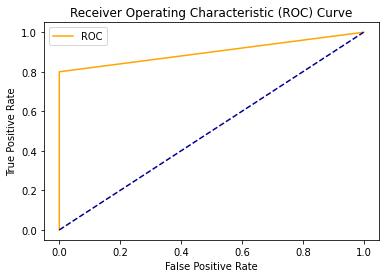

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y, y_predict)


plot_roc_curve(fpr, tpr)

9. Vẽ biểu đồ biểu diễn giá trị của `precision, recall` trên đồ thị khi threshold thay đổi từ `[0, 1]` với steps là 0.05.

10. Viết hàm tính diện tích AUC của mô hình.